In [1]:
import audiosegment
import pydub 
import numpy as np
import sys

modulePath = '../ChristiansPythonLibrary/src' 
sys.path.append(modulePath)
import generalUtility
import dspUtil
import matplotlibUtil


sound = audiosegment.from_file("ses01.wav")
samples = sound.get_array_of_samples()
rate = sound.frame_rate
print(rate)
voiced = sound.filter_silence(duration_s=0.2)
samples = voiced.get_array_of_samples()

def amp2Db(samples):
    dbs = []
    for  x in samples:
        if x < 0:
            v = - dspUtil.rmsToDb(np.abs(x))
        elif x == 0:
            v = 0
        else :
            v = dspUtil.rmsToDb(np.abs(x))
        dbs.append(v)
    return dbs
  
f0 = dspUtil.calculateF0once(amp2Db(voiced.get_array_of_samples()), rate)    
print(f0)
    

# frames = sound.dice(0.032)

# f0s = []
# for f in frames:
#     f0 = dspUtil.calculateF0once(amp2Db(f.get_array_of_samples()), rate)
#     if(f0 != 0):
#         f0s.append(f0)
        
        
        
        
# print(np.min(f0s))
# print(np.max(f0s))
# print(np.std(f0s))
# print(np.mean(f0s))
# print(np.median(f0s))
# print(np.percentile(f0s, 75))

16000
190.95712399699116


/home/vuthede/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


(6000, 9000, 3)


True

<Figure size 432x288 with 0 Axes>

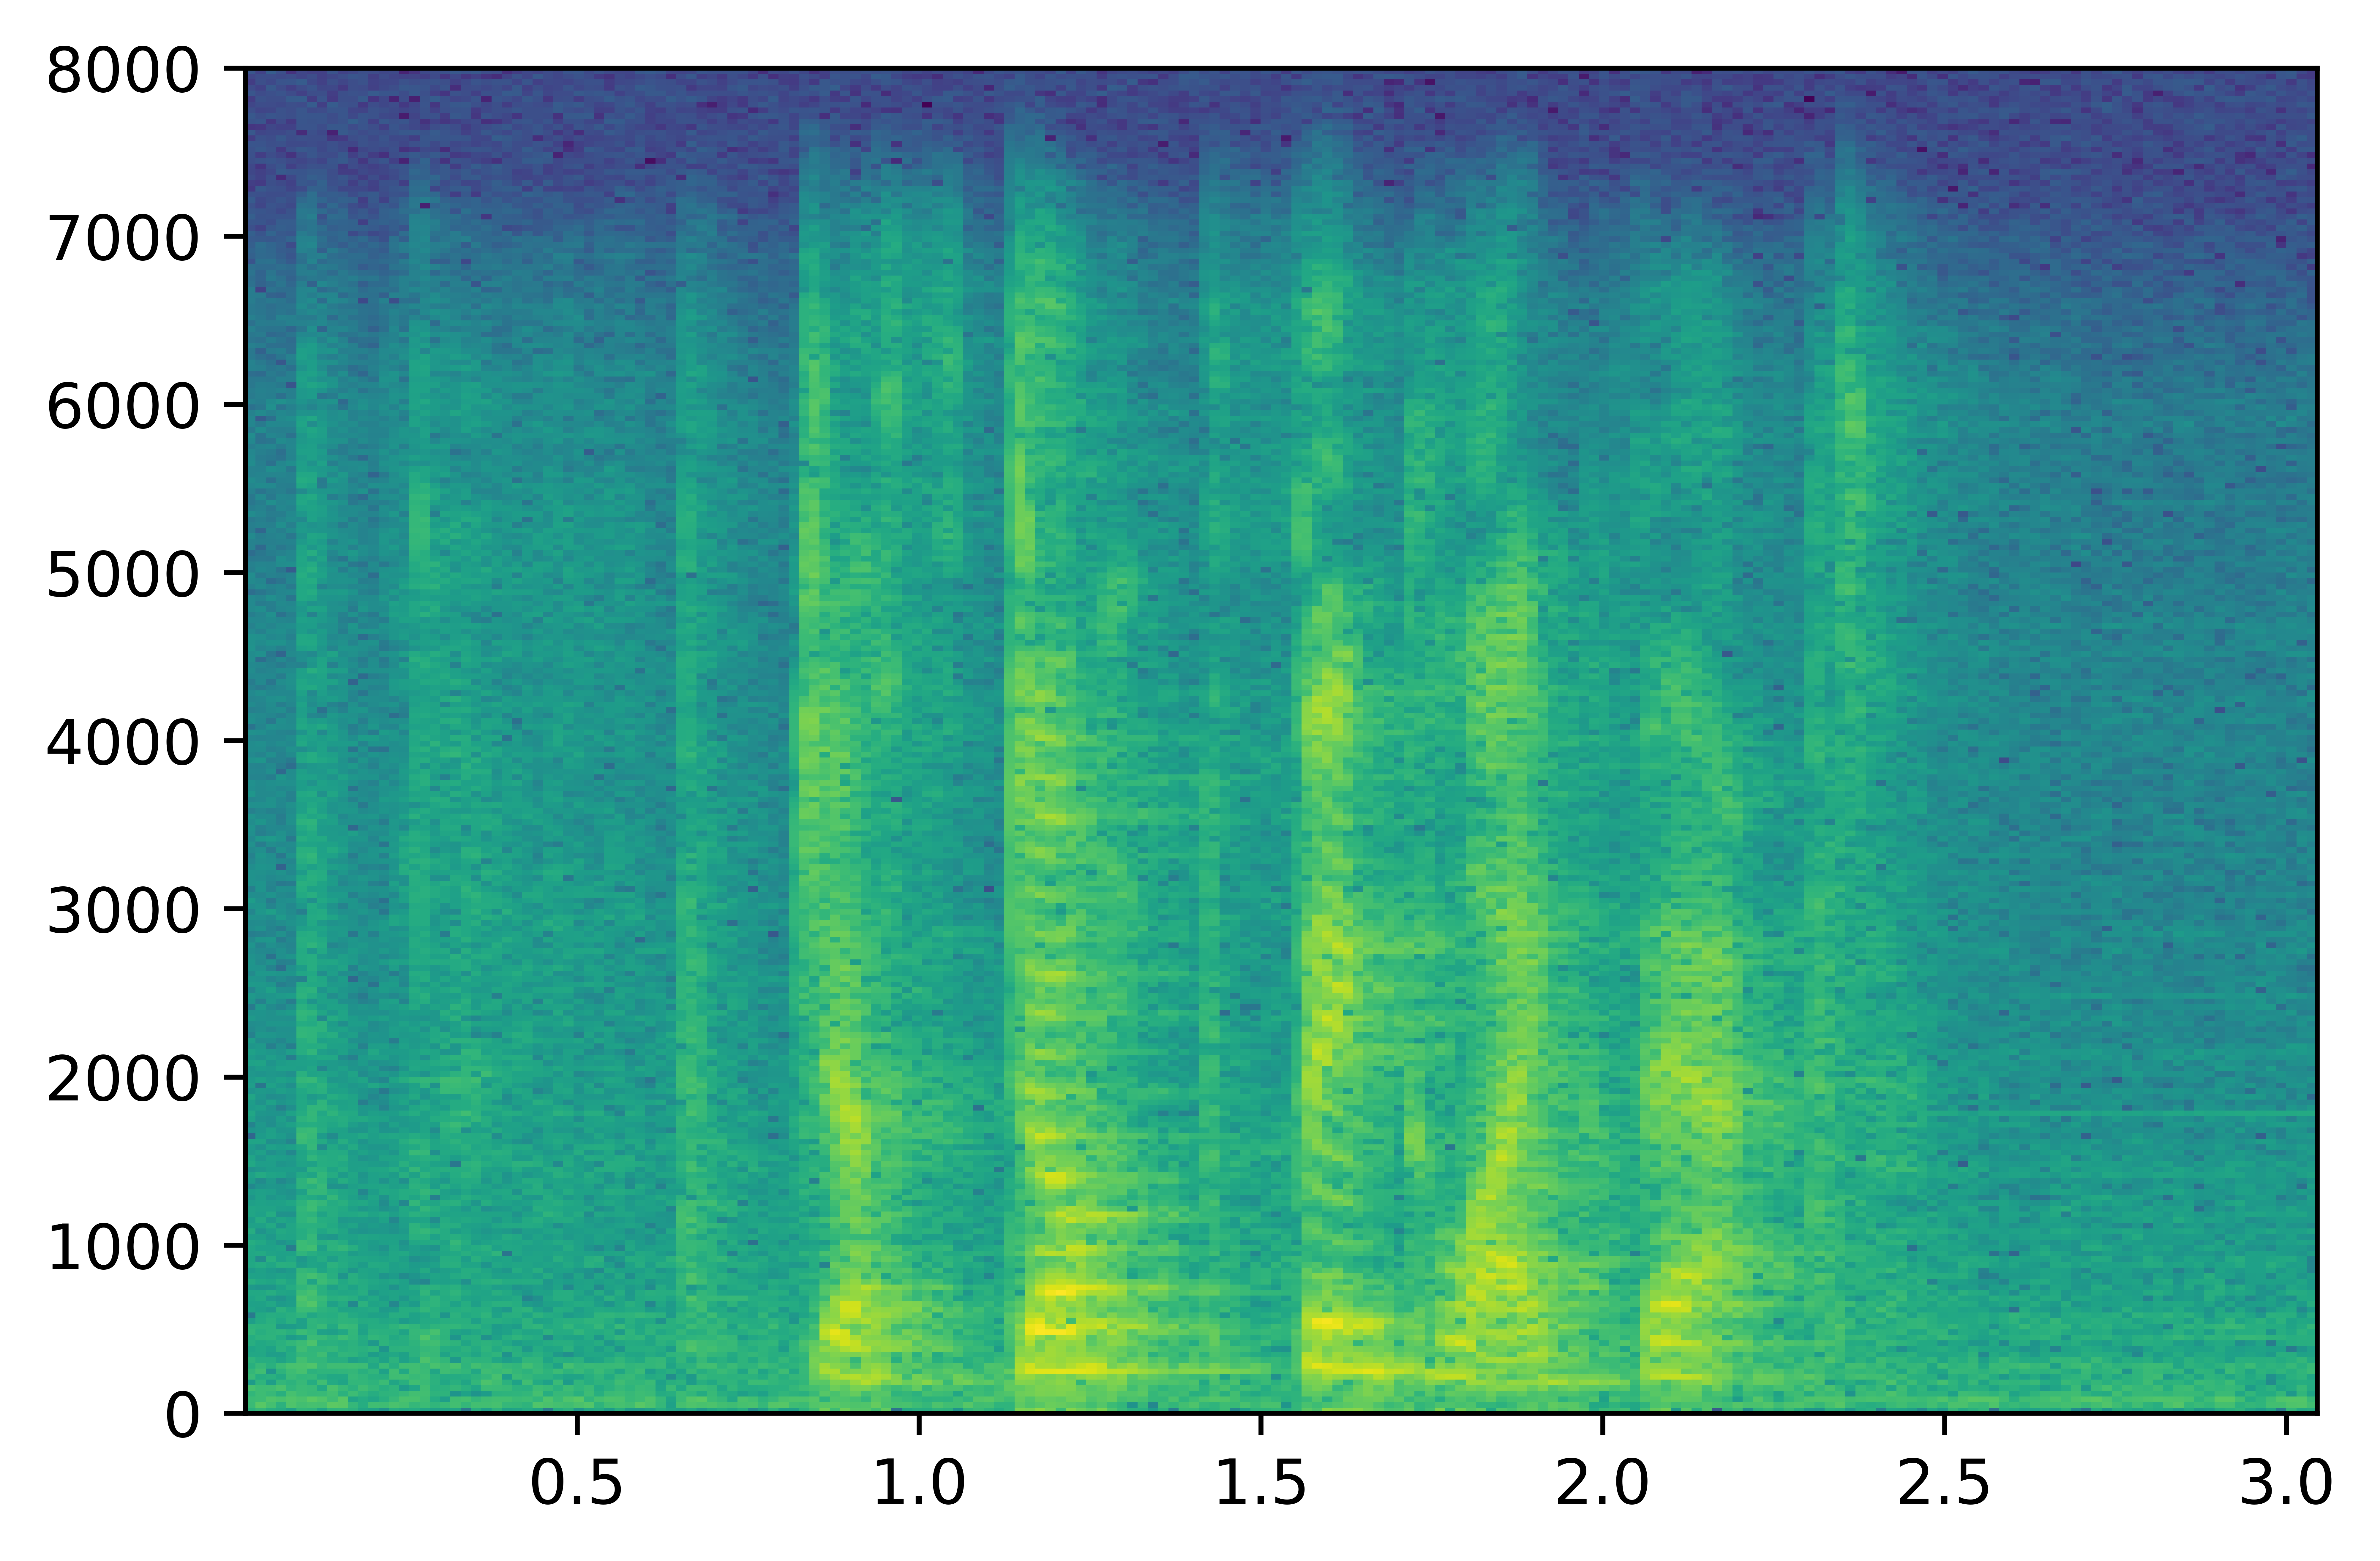

In [17]:
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np
import cv2
#plt.switch_backend('agg')
#...

def fig2data ( fig ):
    fig.canvas.draw ()
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    img = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return img



seg = audiosegment.from_file("9.wav")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.03, overlap=0.5)
amplitudes = 10 * np.log10(amplitudes + 1e-9)


fig = plt.figure()
fig, ax = plt.subplots(dpi = 500 *3)

ax.pcolormesh(times, freqs, amplitudes)

img = fig2data(fig)
img2 = cv2.resize(img, (256, 256))

print(img.shape)





# img2 = cv2.resize(img, (20, 20))


cv2.imwrite('big.png',img)
cv2.imwrite('small.png',img2)
# cv2.imwrite('small.png',img2)



In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)
# ax = fig.gca()

# ax.text(0.0,0.0,"Test", fontsize=45)
# ax.axis('off')

canvas.draw()       # draw the canvas, cache the renderer

image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')

In [16]:
import numpy as np
import cv2

img = cv2.imread('a/spectogram.png', 0)
img2 = cv2.imread('a/spectogram1.png')


print(img2.shape)
print(img.shape)

# print("Before resize: ", len(img), ", " ,len(img2))

img = cv2.resize(img, (256, 256))
img2 = cv2.resize(img2, (256, 256))

cv2.imwrite('small.png',img)



(1200, 1800, 3)
(400, 600)


True

In [ ]:
1849*40

In [ ]:
import matplotlib.pyplot as plt

#...
seg = audiosegment.from_file("video.wav")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.03, overlap=0.5)
amplitudes = 10 * np.log10(amplitudes + 1e-9)

#plt.figure(figsize=(5, 5))

# Plot
plt.ylim([0,8000])

etime  = int(times[-1] / 4)  * 4
plt.xlim([0, etime])

plt.pcolormesh(times, freqs, amplitudes)
plt.axis('off')

print("len time: ", len(times))
print(times[0:10])

#plt.show()

plt.savefig("a/spectogram1.png", transparent=True)





In [ ]:
import audiosegment
import numpy as np
import matplotlib.pyplot as plt

#...
seg = audiosegment.from_file("video.wav")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.03, overlap=0.5)
print(len(freqs))
print(len(times))
amplitudes = 10 * np.log10(amplitudes + 1e-9)
print(amplitudes.shape)

In [ ]:
import librosa
import numpy as np
y, sr = librosa.load("ses01.wav")
a = librosa.stft(y)
#print("shape: ", a)
#a = a.astype(float)
a = np.abs(a)
print(np.max(a))

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
y, sr = librosa.load("ses01.wav")
plt.figure(figsize=(5, 5))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
#plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Linear-frequency power spectrogram')

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
y, sr = librosa.load("ses01.wav")
plt.figure(figsize=(10.2, 10.5))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
#plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Linear-frequency power spectrogram')